# Curso Introducctorio Data Analysis

# 3.- EDA (Exploratory Data Analysis)

Vamos a retormar parte de las ideas anteriores para limpieza y vamos a hacer un análisis de datos con el dataset

## 3.1 - Exploración básica

In [1]:
# Vamos a importar las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
# Importar datos del archivo
df = pd.read_csv(r"coaster_db.csv")

In [3]:
# Shape del archivo
df.shape

(1087, 56)

In [4]:
# Columnas del archivo
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

### 3.1.2 - Dtypes

In [5]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

In [6]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## 3.2 - Data Preparation

Para preparar los datos es importante saber, ¿cuál es el proposito del análisis?

Para ello las preguntas básicas:

- ¿Cuál es el objetivo final?
- ¿Qué datos pueden ser los más relevantes?
- ¿Qué pasos necesito para lograr el objetivo?
- ¿Cómo puedo hacerlo? ¿Qué funciones o librerias?

In [7]:
columnas_interes = [
    "coaster_name",
    "Location",
    "Status",
    "Opening date",
    "Manufacturer",
    "year_introduced",
    "latitude",
    "longitude",
    "Type_Main",
    "opening_date_clean",
    "speed_mph",
    "height_ft",
    "Inversions_clean",
    "Gforce_clean",
    ]
df_subset = df[columnas_interes].copy()

In [8]:
df.head(2)

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0


In [9]:
df_subset.head(2)

,coaster_name,Location,Status,Opening date,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,Coney Island,Removed,"June 16, 1884",LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9
1,Flip Flap Railway,Sea Lion Park,Removed,1895,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0


In [10]:
df_subset.dtypes

coaster_name           object
Location               object
Status                 object
Opening date           object
Manufacturer           object
year_introduced         int64
latitude              float64
longitude             float64
Type_Main              object
opening_date_clean     object
speed_mph             float64
height_ft             float64
Inversions_clean        int64
Gforce_clean          float64
dtype: object

In [11]:
type(df_subset.loc[0,"opening_date_clean"]), df_subset.loc[0,"opening_date_clean"]

(str, '1884-06-16')

### 3.2.1 - Manipulando fechas

In [12]:
# El método .to_datetime() convierte una cadena de caracteres en una fecha
df_subset["opening_date_clean"] = pd.to_datetime(df_subset["opening_date_clean"])


In [13]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Opening date        837 non-null    object        
 4   Manufacturer        1028 non-null   object        
 5   year_introduced     1087 non-null   int64         
 6   latitude            812 non-null    float64       
 7   longitude           812 non-null    float64       
 8   Type_Main           1087 non-null   object        
 9   opening_date_clean  837 non-null    datetime64[ns]
 10  speed_mph           937 non-null    float64       
 11  height_ft           171 non-null    float64       
 12  Inversions_clean    1087 non-null   int64         
 13  Gforce_clean        362 non-null    float64     

Diferencia entre un formato fecha y un string

In [14]:
df_subset["opening_date_clean"][1]

Timestamp('1895-01-01 00:00:00')

In [15]:
df["opening_date_clean"][1]

'1895-01-01'

In [16]:
# Vamos a crear una nueva columna con el año de apertura
df_subset["year_opening"] = df_subset["opening_date_clean"].dt.year

In [60]:
df_subset["opening_date_clean"].dt.year

0       1884.0
1       1895.0
2          NaN
3       1901.0
4       1901.0
         ...  
1082       NaN
1083    2022.0
1084    2016.0
1085       NaN
1086    2022.0
Name: opening_date_clean, Length: 1087, dtype: float64

In [18]:
df_subset["opening_date_clean"].dt.strftime("%y-%M-%d")

0       84-00-16
1       95-00-01
2            NaN
3       01-00-01
4       01-00-01
          ...   
1082         NaN
1083    22-00-01
1084    16-00-16
1085         NaN
1086    22-00-01
Name: opening_date_clean, Length: 1087, dtype: object

In [19]:
df_subset.head(2)

,coaster_name,Location,Status,Opening date,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean,year_opening
0,Switchback Railway,Coney Island,Removed,"June 16, 1884",LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9,1884.0
1,Flip Flap Railway,Sea Lion Park,Removed,1895,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0,1895.0


In [20]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Opening date        837 non-null    object        
 4   Manufacturer        1028 non-null   object        
 5   year_introduced     1087 non-null   int64         
 6   latitude            812 non-null    float64       
 7   longitude           812 non-null    float64       
 8   Type_Main           1087 non-null   object        
 9   opening_date_clean  837 non-null    datetime64[ns]
 10  speed_mph           937 non-null    float64       
 11  height_ft           171 non-null    float64       
 12  Inversions_clean    1087 non-null   int64         
 13  Gforce_clean        362 non-null    float64     

In [21]:
# Vamos a cambiar el tipo de dato de la columna year_opening
df_subset["year_opening"] = df_subset["year_opening"].astype("Int64")

In [22]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Opening date        837 non-null    object        
 4   Manufacturer        1028 non-null   object        
 5   year_introduced     1087 non-null   int64         
 6   latitude            812 non-null    float64       
 7   longitude           812 non-null    float64       
 8   Type_Main           1087 non-null   object        
 9   opening_date_clean  837 non-null    datetime64[ns]
 10  speed_mph           937 non-null    float64       
 11  height_ft           171 non-null    float64       
 12  Inversions_clean    1087 non-null   int64         
 13  Gforce_clean        362 non-null    float64     

In [23]:
df_subset.head(2)

,coaster_name,Location,Status,Opening date,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean,year_opening
0,Switchback Railway,Coney Island,Removed,"June 16, 1884",LaMarcus Adna Thompson,1884,40.574,-73.978,Wood,1884-06-16,6.0,NaN,0,2.9,1884
1,Flip Flap Railway,Sea Lion Park,Removed,1895,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0,1895


In [24]:
df_subset["Gforce_clean"].max(), df_subset["Gforce_clean"].min()

(12.0, 0.8)

In [25]:
df_subset[df_subset["Gforce_clean"] == df_subset["Gforce_clean"].max()]

,coaster_name,Location,Status,Opening date,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions_clean,Gforce_clean,year_opening
1,Flip Flap Railway,Sea Lion Park,Removed,1895,Lina Beecher,1895,40.578,-73.979,Wood,1895-01-01,NaN,NaN,1,12.0,1895


### 3.2.2 - Renombrando columnas

In [26]:
# Nombres actuales de las columnas
df_subset.columns

Index(['coaster_name', 'Location', 'Status', 'Opening date', 'Manufacturer',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions_clean',
       'Gforce_clean', 'year_opening'],
      dtype='object')

In [27]:
df_subset = df_subset.rename(
    columns = {
        'coaster_name': 'Coaster_Name',
        'Inversions_clean': 'Inversions',
        'Gforce_clean': 'Gforce'
        }
    )

In [28]:
df_subset.columns

Index(['Coaster_Name', 'Location', 'Status', 'Opening date', 'Manufacturer',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed_mph', 'height_ft', 'Inversions', 'Gforce',
       'year_opening'],
      dtype='object')

### 3.2.3 - Vizualizando "no values" al estilo pandas

In [29]:
len(df_subset) == len(df.columns)

False

In [30]:
# Cuantos valores nulos hay en cada columna
df_subset.isna().sum()/len(df_subset)*100

Coaster_Name           0.000000
Location               0.000000
Status                19.595216
Opening date          22.999080
Manufacturer           5.427783
year_introduced        0.000000
latitude              25.298988
longitude             25.298988
Type_Main              0.000000
opening_date_clean    22.999080
speed_mph             13.799448
height_ft             84.268629
Inversions             0.000000
Gforce                66.697332
year_opening          22.999080
dtype: float64

### 3.2.4 - Duplicados

In [31]:
df_subset.duplicated('Coaster_Name')

0       False
1       False
2       False
3       False
4       False
        ...  
1082     True
1083    False
1084     True
1085    False
1086    False
Length: 1087, dtype: bool

In [32]:
df_subset.loc[df_subset.duplicated('Coaster_Name')]["Coaster_Name"]

43                   Crystal Beach Cyclone
60                             Derby Racer
61             Blue Streak (Conneaut Lake)
167          Big Thunder Mountain Railroad
237      Thunder Run (Canada's Wonderland)
                       ...                
1063                    Lil' Devil Coaster
1064    Little Dipper (Conneaut Lake Park)
1080                            Iron Gwazi
1082               American Dreier Looping
1084             Tron Lightcycle Power Run
Name: Coaster_Name, Length: 97, dtype: object

In [33]:
df_subset.loc[df_subset.duplicated('Coaster_Name')]["Coaster_Name"].unique()

array(['Crystal Beach Cyclone', 'Derby Racer',
       'Blue Streak (Conneaut Lake)', 'Big Thunder Mountain Railroad',
       "Thunder Run (Canada's Wonderland)", 'La Vibora',
       'Flashback (Six Flags Magic Mountain)', 'Alpine Bobsled',
       'Ultra Twister (Nagashima Spa Land)', 'Ultra Twister (Six Flags)',
       'Batman: The Ride', "Lightnin' Loops", 'Wild Mouse (Idlewild)',
       'Cobra (La Ronde)', "Gadget's Go Coaster",
       'Boomerang: Coast to Coaster', 'Roar (roller coaster)',
       'Flashback (Six Flags New England)', 'Superman – Ride of Steel',
       'The Gold Coaster', 'Lego Technic Test Track',
       "Rock 'n' Roller Coaster Starring Aerosmith",
       'Superman: Ultimate Flight', 'Half Pipe (roller coaster)',
       'Journey to Atlantis', 'Bocaraca', 'American Dreier Looping',
       'Powder Keg: A Blast into the Wilderness',
       "Super Grover's Box Car Derby", 'Flying Fish (roller coaster)',
       'Knightmare (Camelot)', 'Pandemonium (roller coaster)',
    

In [34]:
# Ordenamos los valores para ver los duplicados
df_subset.loc[df_subset.duplicated('Coaster_Name')].sort_values(by = "Coaster_Name")

,Coaster_Name,Location,Status,Opening date,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce,year_opening
780,Afterburn (roller coaster),Carowinds,Operating,"March 20, 1999",Bolliger & Mabillard,2009,35.1003,-80.9409,Steel,1999-03-20,62.0,NaN,6,NaN,1999
270,Alpine Bobsled,Other,NaN,NaN,Intamin,1989,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN,<NA>
435,Alpine Bobsled,Other,NaN,NaN,Intamin,1998,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN,<NA>
686,American Dreier Looping,Other,NaN,NaN,Anton Schwarzkopf,2005,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7,<NA>
738,American Dreier Looping,Other,NaN,NaN,Anton Schwarzkopf,2007,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,Ultra Twister (Six Flags),Other,NaN,NaN,TOGO,1990,NaN,NaN,Steel,NaT,44.0,NaN,3,NaN,<NA>
1044,Untamed (Walibi Holland),Walibi Holland,Operating,"July 1, 2019",Rocky Mountain Construction,2019,52.4428,5.7608,Steel,2019-07-01,57.2,NaN,5,NaN,2019
347,Wild Mouse (Idlewild),Idlewild and Soak Zone,Operating,1985 (original)1993 (current location)[1],Vekoma,1993,40.2598,-79.2799,Steel,1985-01-01,30.0,NaN,0,NaN,1985
749,Wipeout (roller coaster),Pleasurewood Hills,Operating,2007,Vekoma,2007,52.5075,1.7434,Steel,2007-01-01,50.0,NaN,6,NaN,2007


### 3.2.4.2 - Usando Query para visualizar duplicados

In [35]:
# Visualizando los duplicados usando query
df_subset.query("Coaster_Name == 'Zippin Pippin'")

,Coaster_Name,Location,Status,Opening date,Manufacturer,year_introduced,latitude,longitude,Type_Main,opening_date_clean,speed_mph,height_ft,Inversions,Gforce,year_opening
16,Zippin Pippin,Other,NaN,NaN,The Gravity Group,1912,NaN,NaN,Wood,NaT,40.0,NaN,0,NaN,<NA>
858,Zippin Pippin,Other,NaN,NaN,The Gravity Group,2011,NaN,NaN,Wood,NaT,40.0,NaN,0,NaN,<NA>


### 3.2.4.3 Multiples duplicados en un sucojunto de columnas

In [36]:
df_subset.duplicated(subset=["Coaster_Name", "Location", "Opening date"]).sum()

97

In [37]:
df_no_duplicates = df_subset.drop_duplicates(subset=["Coaster_Name", "Location", "Opening date"], keep=False)

In [38]:
df_no_duplicates.shape

(914, 15)

## 3.5 - Entendiendo los características (Featuring Understanding)
Este tipo de análisis es univariado

 - gráficas de visualización
 

### 3.5.1 - Contando valores o ¿Cuántas veces se repite un valor?

In [39]:
# ¿cuántas veces se repite cada año?
df_no_duplicates["year_introduced"].value_counts()

1999    39
2000    37
2001    27
1998    27
2002    27
        ..
1955     1
1956     1
1959     1
1961     1
1884     1
Name: year_introduced, Length: 98, dtype: int64

In [62]:
# ¿cuántas veces se repite cada año de year_introduced?
df_no_duplicates["year_introduced"].value_counts().sort_index()[15:20]

1920    3
1921    1
1923    2
1924    5
1925    6
Name: year_introduced, dtype: int64

### 3.5.2 Gráficas tipo barras

<AxesSubplot: >

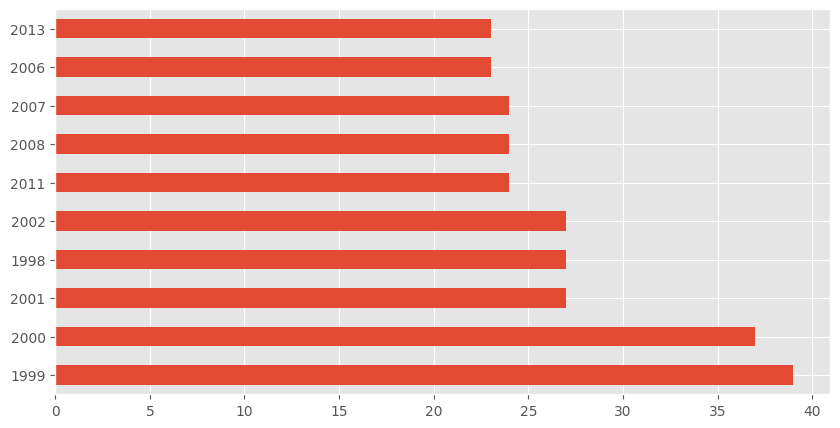

In [63]:
# Barras horizontales
df_no_duplicates["year_introduced"].value_counts().head(10).plot(kind = "barh",  figsize= (10, 5))

<AxesSubplot: title={'center': 'Top 10 años con más montañas rusas introducidas'}, xlabel='Año', ylabel='Número de montañas rusas'>

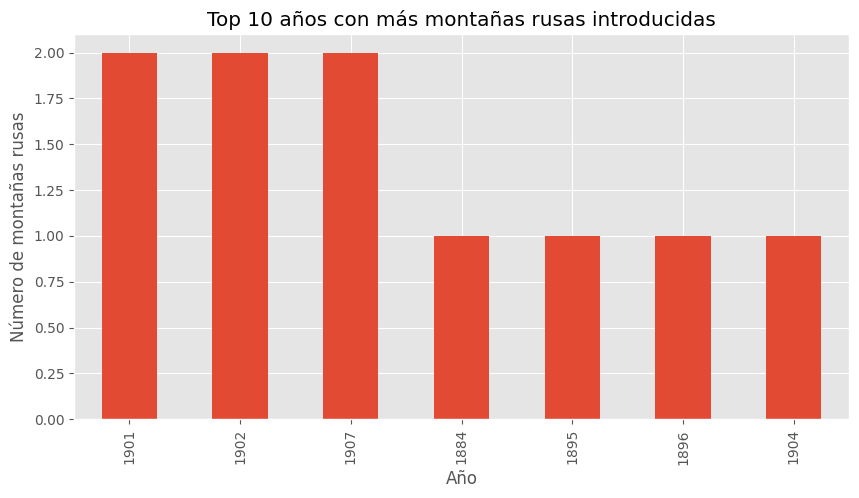

In [65]:
# Barras verticales
df_no_duplicates["year_introduced"].head(10).value_counts().plot(
    kind = "bar",
    figsize = (10, 5),
    title="Top 10 años con más montañas rusas introducidas",
    xlabel="Año",
    ylabel="Número de montañas rusas"
    )

<AxesSubplot: title={'center': 'Top 10 años con más montañas rusas introducidas'}, xlabel='Año', ylabel='Número de montañas rusas'>

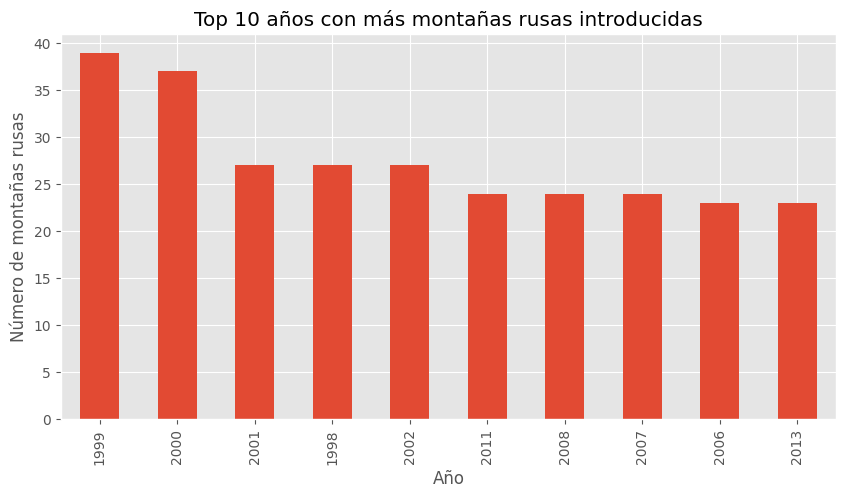

In [66]:
# Barras verticales
df_no_duplicates["year_introduced"].value_counts().head(10).plot(
    kind = "bar",
    figsize = (10, 5),
    title="Top 10 años con más montañas rusas introducidas",
    xlabel="Año",
    ylabel="Número de montañas rusas"
    )

### 3.5.3 - Gráficas para distribuciones: Histogramas y KDE

<AxesSubplot: title={'center': 'Distribución de la velocidad de las montañas rusas'}, ylabel='Frequency'>

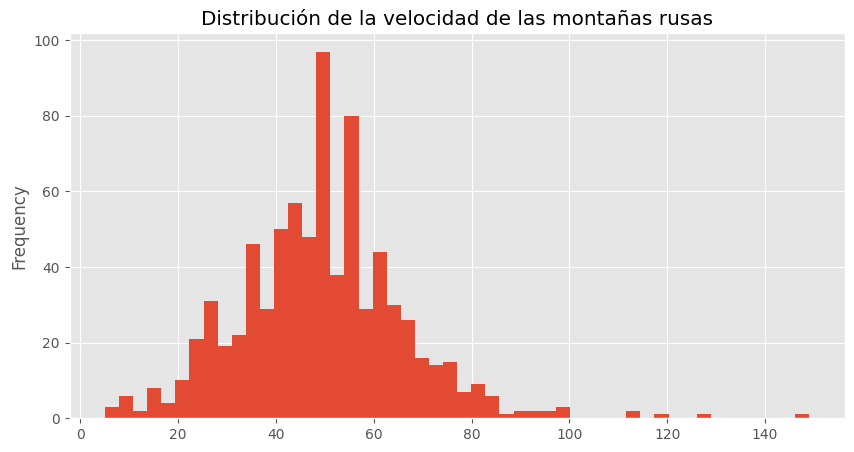

In [67]:
# ¿Qué distribución tienen las montañas rusas por velocidad?
df_no_duplicates["speed_mph"].plot(
    kind = "hist",
    bins = 50, 
    figsize = (10, 5),
    title="Distribución de la velocidad de las montañas rusas",
    xlabel="Velocidad (mph)",
    ylabel="Número de montañas rusas"
    )

<AxesSubplot: title={'center': 'Distribución de la velocidad de las montañas rusas'}, ylabel='Density'>

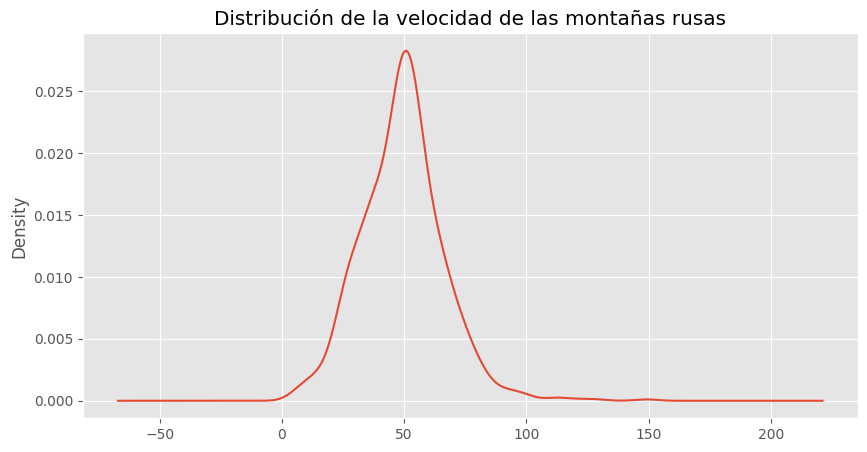

In [68]:
# ¿Cómo se distribuyen las montañas rusas por velocidad?
df_no_duplicates["speed_mph"].plot(
    kind = "kde",
    figsize = (10, 5),
    title="Distribución de la velocidad de las montañas rusas",
    xlabel="Velocidad (mph)",
    ylabel="Número de montañas rusas"
    )

## 3.6 - Relación entre características

### 3.6.1 - Scatter plot

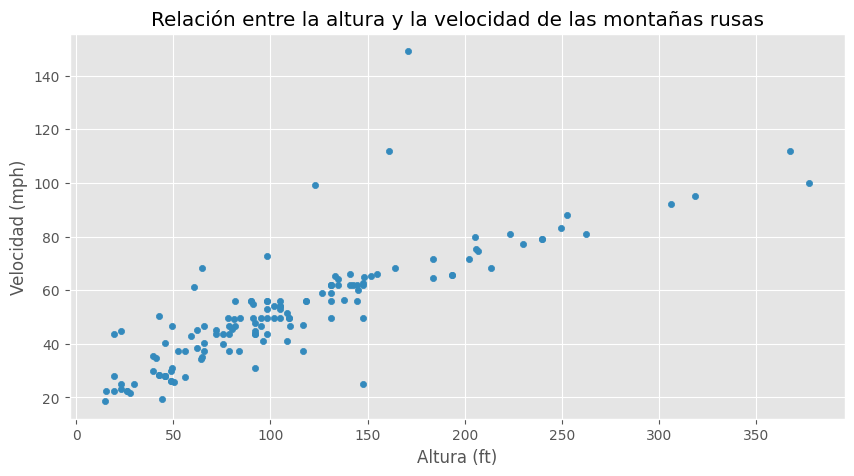

In [69]:
# ¿Cómo se comporta la velocidad de las montañas rusas a medida que la altura cambia?
df_no_duplicates.plot(
    kind = "scatter",
    x = "height_ft",
    y = "speed_mph",
    figsize = (10, 5),
    title="Relación entre la altura y la velocidad de las montañas rusas",
    xlabel="Altura (ft)",
    ylabel="Velocidad (mph)"
    )
plt.show()

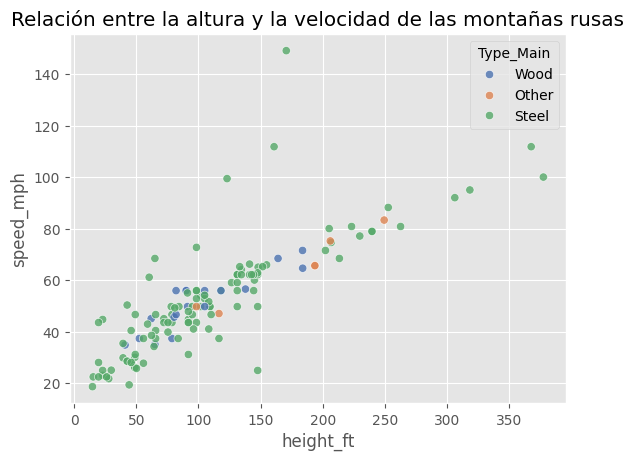

In [75]:
#  ¿Cómo se comporta la velocidad de las montañas rusas a medida que la altura cambia y del tipo de material utilizado?
import seaborn as sns

ax = sns.scatterplot(
    data = df_no_duplicates,
    x = "height_ft",
    y = "speed_mph",
    hue = "Type_Main",
    palette = "deep",
    alpha = 0.8
    )
ax.set_title("Relación entre la altura y la velocidad de las montañas rusas")
plt.show()

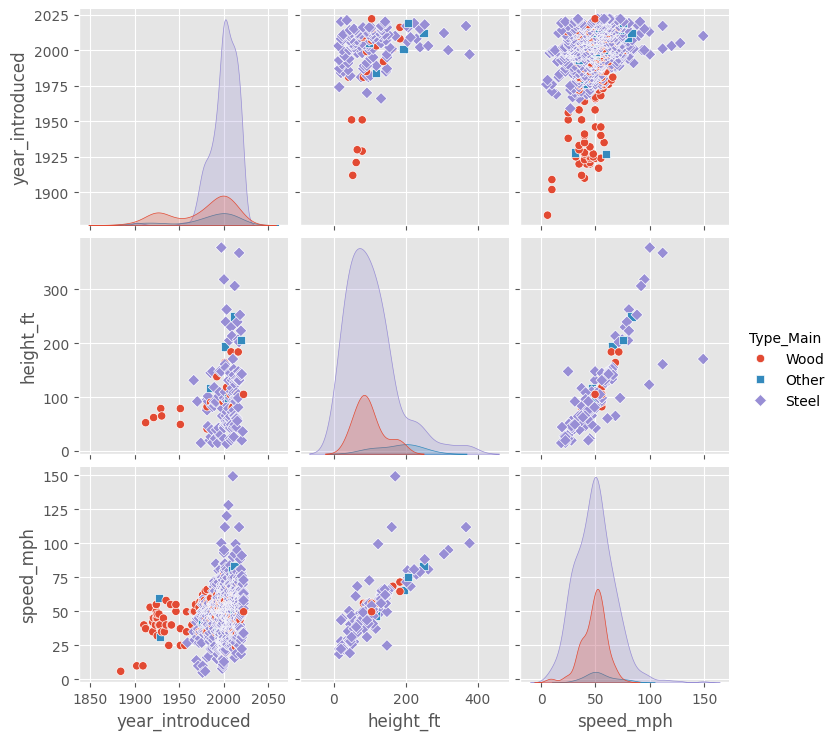

In [76]:
# Vamos a comparar multiples variables
# ¿Eiste alguna relación o correlación entre el año que se contruyeron las motañas rusas, su altura y la velocidad?
sns.pairplot(
    df_no_duplicates,
    vars=["year_introduced", "height_ft", "speed_mph"],
    kind="scatter",
    hue="Type_Main",
    markers=["o", "s", "D"],
    )
plt.show()


<AxesSubplot: >

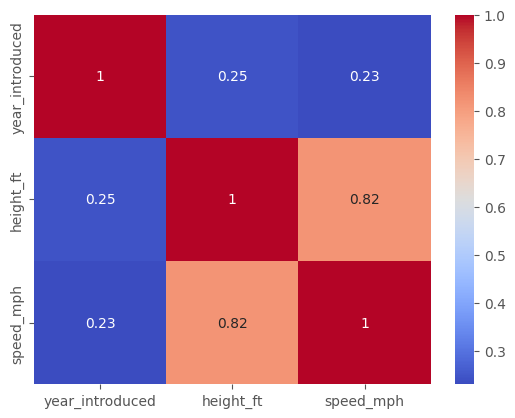

In [48]:
# ¿Qué correlación existe entre las variables?
correlation = df_no_duplicates[["year_introduced", "height_ft", "speed_mph"]].corr()
sns.heatmap(correlation, annot=True, cmap="coolwarm")

/tmp/ipykernel_11893/2959622305.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(df_no_duplicates.corr(), annot = True, cmap = "viridis")


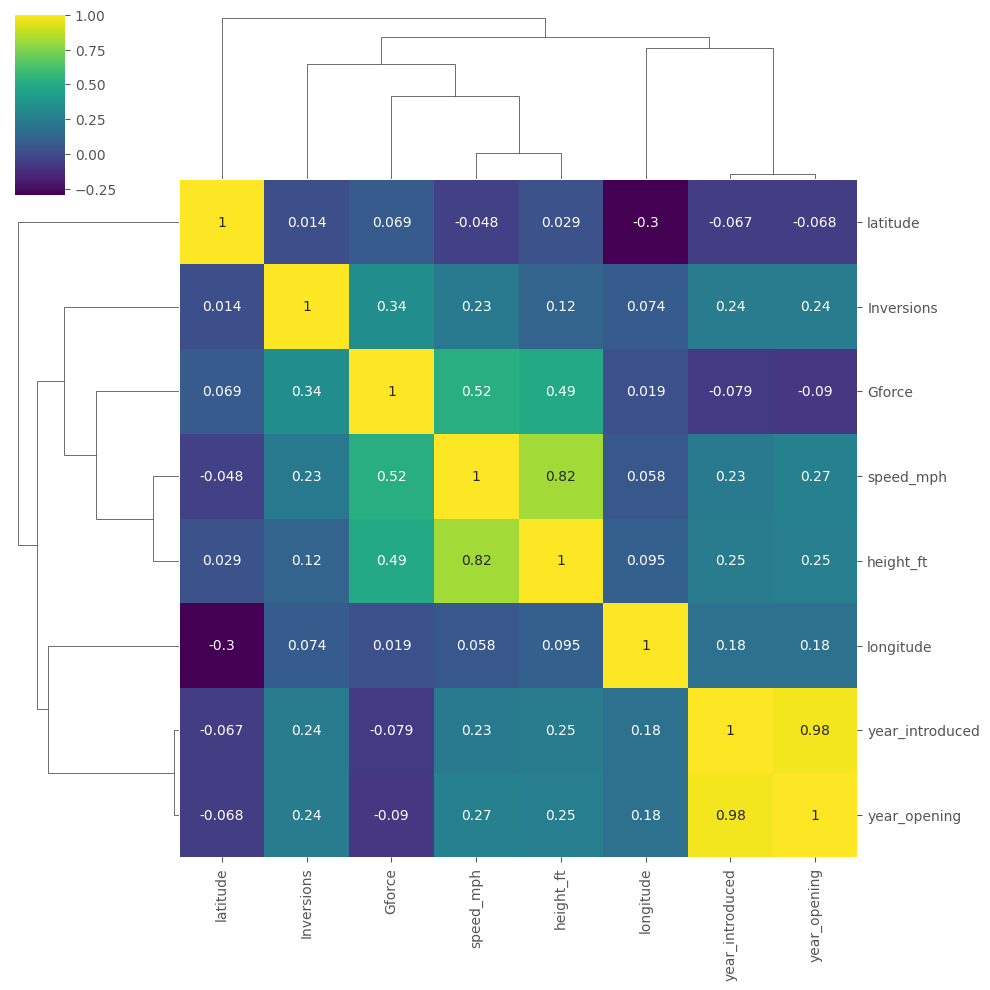

In [78]:
# Clustering hetmap
sns.clustermap(df_no_duplicates.corr(), annot = True, cmap = "viridis")